<a href="https://colab.research.google.com/github/arkobera/Research-SIH/blob/main/ElectricityIndia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_json("/content/perCapitaCons.json")
df.head()

,ID,Year,State,value
0,1665,2002-03,Daman & Diu,7375.94
1,1925,2002-03,West Bengal,366.5
2,1525,2002-03,Rajasthan,566.14
3,1945,2002-03,Sikkim,246.87
4,1965,2002-03,A.& N. Islands,375.14


In [ ]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y-%y')
df.head()

,ID,Year,State,value
0,1665,2003-01-01,Daman & Diu,7375.94
1,1925,2003-01-01,West Bengal,366.5
2,1525,2003-01-01,Rajasthan,566.14
3,1945,2003-01-01,Sikkim,246.87
4,1965,2003-01-01,A.& N. Islands,375.14


**For now we will just focus on Delhi**

In [ ]:
delhi_df = df[df['State'] == 'Delhi']
print(delhi_df.shape,delhi_df.info())
delhi_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 37 to 810
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      20 non-null     int64         
 1   Year    20 non-null     datetime64[ns]
 2   State   20 non-null     object        
 3   value   20 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 800.0+ bytes
(20, 4) None


,ID,Year,State,value
37,1425,2003-01-01,Delhi,1426.17
55,1426,2004-01-01,Delhi,1542.04
92,1427,2005-01-01,Delhi,1553.774338294076
166,1428,2006-01-01,Delhi,1766.94
187,1429,2007-01-01,Delhi,1417.22


In [ ]:
delhi_df['Year'] = df['Year'].dt.year
delhi_df.head()

<ipython-input-9-9ac1215ac9bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_df['Year'] = df['Year'].dt.year


,ID,Year,State,value
37,1425,2003,Delhi,1426.17
55,1426,2004,Delhi,1542.04
92,1427,2005,Delhi,1553.774338294076
166,1428,2006,Delhi,1766.94
187,1429,2007,Delhi,1417.22


In [ ]:
fig = px.line(delhi_df,x='Year',y="value",title="Delhi Per Capita Consumption")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

**Hence we can conclude that the consumption of power has increased linearly with time - increasing trend
**

Almost all the states show this sme pattern. from this we can infer the following
1. During the Peak festivals and Monsoon the Outge is more.
2. The peak increased to some extend in 2021, but saw a gradual decline in 2022.

From the above two analysis we can conclude that to some extend the incresing demand has a influence on the power outage

**Power Generation**

In [ ]:
import pandas as pd
Power_Generation = pd.read_json("/content/power_Generation.json")
Power_Generation.head()

,ID,Month,fy,mode,Region_State,bus
0,1,Feb-2019,2018-2019,THERMAL,All India,89.30048
1,2,Feb-2019,2018-2019,NUCLEAR,All India,3.17291
2,3,Feb-2019,2018-2019,HYDRO,All India,8.43584
3,4,Feb-2019,2018-2019,BHUTAN IMP_Hydro,All India,0.06820
4,5,Feb-2019,2018-2019,RENEWABLE,All India,11.24518


In [ ]:
Power_Generation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            259 non-null    int64  
 1   Month         259 non-null    object 
 2   fy            259 non-null    object 
 3   mode          259 non-null    object 
 4   Region_State  259 non-null    object 
 5   bus           259 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 12.3+ KB


In [ ]:
Power_Generation['fy'] = pd.to_datetime(Power_Generation['fy'].str[:4], format='%Y')
Power_Generation['Month'] = pd.to_datetime(Power_Generation['Month'], format='%b-%Y')
#Power_Generation.set_index('fy',inplace=True)
Power_Generation

,ID,Month,fy,mode,Region_State,bus
0,1,2019-02-01,2018-01-01,THERMAL,All India,89.30048
1,2,2019-02-01,2018-01-01,NUCLEAR,All India,3.17291
2,3,2019-02-01,2018-01-01,HYDRO,All India,8.43584
3,4,2019-02-01,2018-01-01,BHUTAN IMP_Hydro,All India,0.06820
4,5,2019-02-01,2018-01-01,RENEWABLE,All India,11.24518
...,...,...,...,...,...,...
254,252,2024-06-01,2024-01-01,THERMAL,All India,120.86506
255,256,2024-07-01,2024-01-01,THERMAL,All India,111.40642
256,257,2024-07-01,2024-01-01,NUCLEAR,All India,4.79984
257,258,2024-07-01,2024-01-01,HYDRO,All India,17.56291


In [ ]:
Power_Generation['Month'] = Power_Generation['Month'].dt.month
Power_Generation.head()

,ID,Month,fy,mode,Region_State,bus
0,1,2,2018-01-01,THERMAL,All India,89.30048
1,2,2,2018-01-01,NUCLEAR,All India,3.17291
2,3,2,2018-01-01,HYDRO,All India,8.43584
3,4,2,2018-01-01,BHUTAN IMP_Hydro,All India,0.06820
4,5,2,2018-01-01,RENEWABLE,All India,11.24518


In [ ]:
Power_Generation['mode'].value_counts()

,count
mode,
THERMAL,64
NUCLEAR,64
HYDRO,64
BHUTAN IMP,61
BHUTAN IMP_Hydro,3
RENEWABLE,3


Contribution of each scource

In [ ]:
share_df = Power_Generation.groupby(['mode'])['bus'].sum().reset_index()
share_df.head()

,mode,bus
0,BHUTAN IMP,34.50498
1,BHUTAN IMP_Hydro,0.43258
2,HYDRO,794.43922
3,NUCLEAR,248.28586
4,RENEWABLE,33.17945


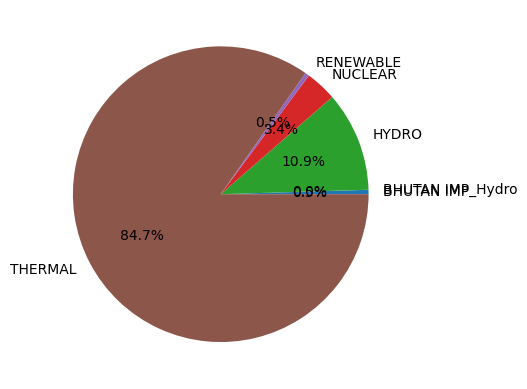

In [ ]:
plt.pie(share_df['bus'],labels=share_df['mode'],autopct='%1.1f%%')
plt.show()

**Thermal PowerPlant**

In [ ]:
df_thermal = Power_Generation[Power_Generation['mode'] == 'THERMAL']
res_t = df_thermal.groupby(['fy'])['bus'].sum()
res_t.head()

,bus
fy,
2018-01-01,172.11290
2019-01-01,821.83312
2020-01-01,1032.51354
2021-01-01,1114.71448
2022-01-01,1206.21067


In [ ]:
fig3 = px.line(res_t,x=res_t.index,y="bus",title="Thermal PowerPlant")
fig3.update_xaxes(rangeslider_visible=True)
fig3.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



NUCLEAR

In [ ]:
df_nuclear = Power_Generation[Power_Generation['mode'] == 'NUCLEAR'] # This line is correct
res_t2 = df_nuclear.groupby(['fy'])['bus'].sum()
fig4 = px.line(res_t2,x=res_t2.index,y="bus",title="Nuclear PowerPlant")
fig4.update_xaxes(rangeslider_visible=True)
fig4.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



HYDRO

In [ ]:
df_hydro = Power_Generation[Power_Generation['mode'] == 'HYDRO']
res_t3 = df_hydro.groupby(['fy'])['bus'].sum()
fig5 = px.line(res_t3,x=res_t3.index,y="bus",title="Hydro PowerPlant")
fig5.update_xaxes(rangeslider_visible=True)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



From here we can conclude that the generation of the above to scources of energy were high uptill 2022 and then there was a sudden decrease in the generation
REMARK:  The generation of the two main scources of electricity are depriciating

Coal Rescources in India

In [ ]:
import pandas as pd
Coal_df = pd.read_csv("/content/Coal_Reserves_India.csv")
Coal_df.head()

,As on,Measured,Indicated,Inferred,Total,Resource Augmentation in comparison to the previous year
0,1st April 2020,163.46,150.39,30.17,344.02,17.52
1,1st April 2021,177.18,146.95,28.00,352.13,8.11
2,1st April 2022,187.11,147.25,27.05,361.41,9.29
3,1st April 2023,199.90,151.68,26.62,378.21,16.80


In [ ]:
# Use the dayfirst argument to correctly handle days at the beginning of the string
Coal_df['As on'] = pd.to_datetime(Coal_df['As on'], dayfirst=True)
Coal_df.head()

,As on,Measured,Indicated,Inferred,Total,Resource Augmentation in comparison to the previous year
0,2020-04-01,163.46,150.39,30.17,344.02,17.52
1,2021-04-01,177.18,146.95,28.00,352.13,8.11
2,2022-04-01,187.11,147.25,27.05,361.41,9.29
3,2023-04-01,199.90,151.68,26.62,378.21,16.80


Toatal Coal rescources year wise

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

# Ensure that the 'As on' column is in datetime format
Coal_df['As on'] = pd.to_datetime(Coal_df['As on'], format='%d %B %Y')

# Plotting the line chart using Plotly
fig1 = px.line(Coal_df, x='As on', y="Total", title="Coal Mined in India")
fig1.update_xaxes(rangeslider_visible=True)

# To display Plotly figure (use fig1.show() for Plotly; plt.show() is for Matplotlib)
fig1.show()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



%Increase in reserves

In [ ]:
fig2 = px.line(Coal_df, x='As on', y="Resource Augmentation in comparison to the previous year", title="Percentage increase in Mining")
fig2.update_xaxes(rangeslider_visible=True)
fig2.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



*From above analysis we observe that the consumption of rescources have increased with time, but there is a drop in discovery of new rescources, still the output from Thermal Plants remain the same.
This infers the fact that the IMPORT OF COAL HAS INCREASED in India*

**Analyzing the sales of the energy
**

In [ ]:
sales_df = pd.read_json("/content/sales.json")
sales_df.head()

,ID,Year,State,region,domestic,commercial,industrial_low_volt,industrial_high_volt,public_lighting,traction,agriculture,public_water_works,miscellaneous,total_energy_sold
0,1003,2012-13,Mizoram,NER,197.59,21.10,1.81,1.47,5.36,0.00,0.08,37.23,21.96,286.60
1,984,2012-13,D & N Haveli,WR,71.80,27.79,163.31,4323.54,5.04,0.00,3.55,0,2.05,4597.08
2,983,2012-13,Daman & Diu,WR,77.31,38.50,160.22,1527.8,6.46,0.00,4.19,1.11,0.00,1815.59
3,982,2012-13,Goa,WR,835.00,216.00,127.03,1765.99,15.00,0.00,21.00,101,0.00,3081.02
4,981,2012-13,Maharashtra,WR,22594.63,12885.88,6489.92,35324.5,1258.55,2341.92,22059.05,1784.04,174.67,104913.16


In [ ]:
sales_df['Year'] = pd.to_datetime(sales_df['Year'], format='%Y-%y')
sales_df.head()

,ID,Year,State,region,domestic,commercial,industrial_low_volt,industrial_high_volt,public_lighting,traction,agriculture,public_water_works,miscellaneous,total_energy_sold
0,1003,2013-01-01,Mizoram,NER,197.59,21.10,1.81,1.47,5.36,0.00,0.08,37.23,21.96,286.60
1,984,2013-01-01,D & N Haveli,WR,71.80,27.79,163.31,4323.54,5.04,0.00,3.55,0,2.05,4597.08
2,983,2013-01-01,Daman & Diu,WR,77.31,38.50,160.22,1527.8,6.46,0.00,4.19,1.11,0.00,1815.59
3,982,2013-01-01,Goa,WR,835.00,216.00,127.03,1765.99,15.00,0.00,21.00,101,0.00,3081.02
4,981,2013-01-01,Maharashtra,WR,22594.63,12885.88,6489.92,35324.5,1258.55,2341.92,22059.05,1784.04,174.67,104913.16


In [ ]:
yearly_analysis = sales_df.groupby('Year')['total_energy_sold'].sum().reset_index()
yearly_analysis.head()

,Year,total_energy_sold
0,2013-01-01,8.243012e+05
1,2014-01-01,8.734282e+05
2,2015-01-01,9.457367e+05
3,2018-01-01,1.123427e+06
4,2019-01-01,1.209972e+06


In [ ]:
yearly_analysis['total_energy_sold'] = yearly_analysis['total_energy_sold'].apply(lambda x: '{:,.2f}'.format(x))
yearly_analysis.head()

,Year,total_energy_sold
0,2013-01-01,"824,301.17"
1,2014-01-01,"873,428.18"
2,2015-01-01,"945,736.65"
3,2018-01-01,"1,123,426.86"
4,2019-01-01,"1,209,971.63"


Energy consumption based on sector

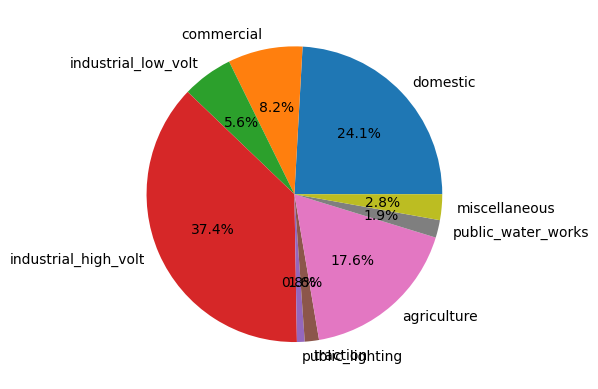

In [ ]:
# Convert the selected columns to numeric type, forcing non-convertible values to NaN
sales_sec = sales_df[['domestic','commercial','industrial_low_volt','industrial_high_volt','public_lighting','traction','agriculture','public_water_works','miscellaneous']].apply(pd.to_numeric, errors='coerce')

# Calculate the sum, ignoring NaN values
plt.pie(sales_sec.sum(skipna=True),labels=sales_sec.columns,autopct='%1.1f%%')
plt.show()

Sales over the years

In [ ]:
fig3 = px.line(yearly_analysis,x='Year',y="total_energy_sold",title="Energy Sales")
fig3.update_xaxes(rangeslider_visible=True)
fig3.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



There is an increasing trend in sales of electricity through government authorities


In [ ]:
growth_df  =pd.read_json("/content/growth.json")
growth_df.head()

,id,as_on,installed_capacity,number_of_villages_electrified,length_t_and_d_lines,per_capita_consumption,sixty_six_kv_and_above,below_sixty_six_kv
0,42,31.12.1947,1362.0,NULL,23238,16.3,6430,16808
1,43,31.12.1950,1713.0,3061,29271,18.2,8271,21000
2,44,31.03.1956( End of the 1st Plan),2886.0,7294,85427,30.9,16552,68875
3,45,31.03.1961( End of the 2nd Plan),4653.0,21754,157887,45.9,26706,131181
4,46,31.03.1966 ( End of the 3rd Plan),9027.0,45148,541704,73.90000000000001,46033,495671


In [ ]:
growth_df['as_on'] = growth_df['as_on'].str.extract(r'(\d{2}.\d{2}.\d{4})')  # Extract the date part only
growth_df['as_on'] = pd.to_datetime(growth_df['as_on'], dayfirst=True, errors='coerce')  # Convert to datetime
growth_df.head()

,id,as_on,installed_capacity,number_of_villages_electrified,length_t_and_d_lines,per_capita_consumption,sixty_six_kv_and_above,below_sixty_six_kv
0,42,1947-12-31,1362.0,NULL,23238,16.3,6430,16808
1,43,1950-12-31,1713.0,3061,29271,18.2,8271,21000
2,44,1956-03-31,2886.0,7294,85427,30.9,16552,68875
3,45,1961-03-31,4653.0,21754,157887,45.9,26706,131181
4,46,1966-03-31,9027.0,45148,541704,73.90000000000001,46033,495671


In [ ]:
def to_number(x):
  if x == 'NULL' or x == '': # Added check for empty string
    return 0
  return int(x)
growth_df['number_of_villages_electrified'] = growth_df['number_of_villages_electrified'].apply(to_number)
growth_df.head()

,id,as_on,installed_capacity,number_of_villages_electrified,length_t_and_d_lines,per_capita_consumption,sixty_six_kv_and_above,below_sixty_six_kv
0,42,1947-12-31,1362.0,0,23238,16.3,6430,16808
1,43,1950-12-31,1713.0,3061,29271,18.2,8271,21000
2,44,1956-03-31,2886.0,7294,85427,30.9,16552,68875
3,45,1961-03-31,4653.0,21754,157887,45.9,26706,131181
4,46,1966-03-31,9027.0,45148,541704,73.90000000000001,46033,495671


In [ ]:
fig4 = px.line(growth_df,x='as_on',y="number_of_villages_electrified",title="Number of Villages Electrified")
fig4.update_xaxes(rangeslider_visible=True)
fig4.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



Grid Reliability and loses

In [ ]:
tra_cap_df = pd.read_json("/content/transmission_cap.json")
tra_cap_df.head()

,id,month,voltage_ratio,station_name,capacity,executing_agency,sector
0,2304,Jan-1970,220/33,220/33kv Purusothapatnam (T/F-II),50,APTRANSCO,State Sector
1,2305,Jan-1970,220/132,220/132/33 KV GSS Digha (New) (2x200 MVA T/F),400,BSPTCL,State Sector
2,2306,Jan-1970,220/66,400 kV Vav (Augmentation of 100 MVA T/F to 160...,60,GETCO,State Sector
3,2307,Jan-1970,220/132,220/132 kV GIS Sub-Station at Mazra Distt Chamba,200,HPPTCL,State Sector
4,2308,Jan-1970,220/33,33/220 kV 25/31.5 MVA Power Transformer at 220...,32,HPPTCL,State Sector


In [ ]:
tra_cap_df['month'] = pd.to_datetime(tra_cap_df['month'], format='%b-%Y')
tra_req_df = tra_cap_df.groupby('month')['capacity'].sum().reset_index()
tra_req_df.head()

,month,capacity
0,1970-01-01,6572
1,2014-01-01,9340
2,2014-02-01,7850
3,2014-03-01,12565
4,2014-04-01,1690


In [ ]:
fig5 = px.line(tra_req_df,x='month',y="capacity",title="Transmission Capacity")
fig5.update_xaxes(rangeslider_visible=True)
fig5.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



The month of march saw an high increase in capacity of thriugh transmission lines

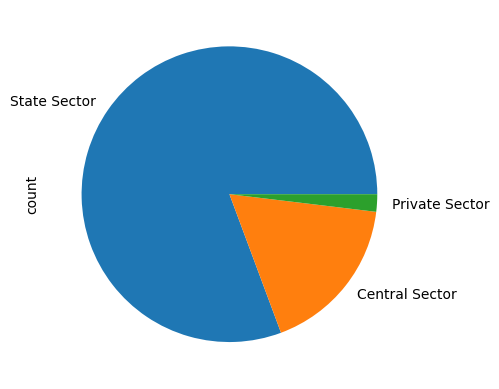

In [ ]:
sec_df = tra_cap_df['sector'].value_counts()
sec_df.iloc[:-1].plot(kind='pie')
plt.show()

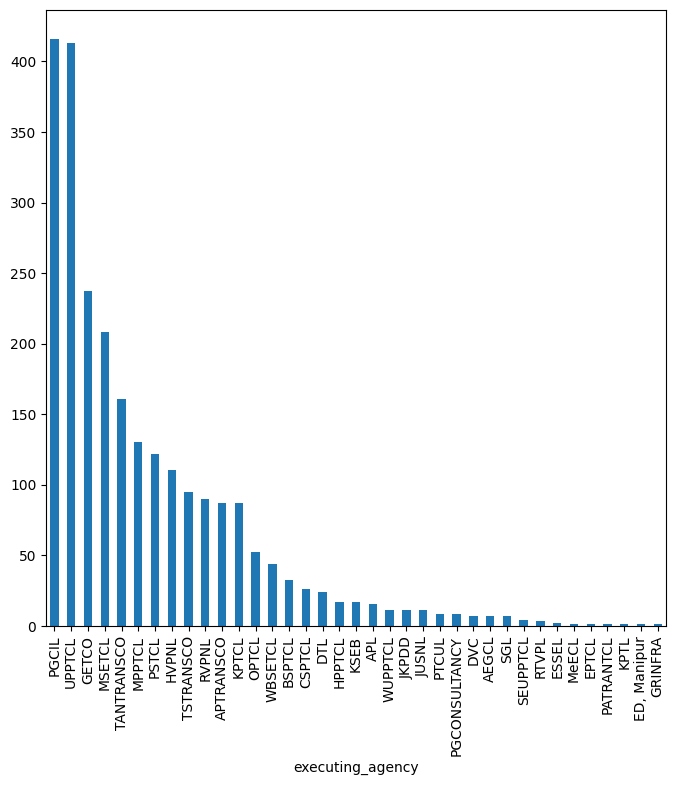

In [ ]:
import matplotlib.pyplot as plt

# Assuming tra_cap_df is your DataFrame and 'executing_agency' is the column of interest
exe_df = tra_cap_df['executing_agency'].value_counts()

# Plot pie chart with labels
ax = exe_df.iloc[:-1].plot(kind='bar', figsize=(8, 8))

# Display the pie chart
plt.show()


Region Wise Power Supply

In [ ]:
import pandas as pd

region_df = pd.read_json("/content/powerSupplyPos.json")
region_df.head()

,ID,Month,State,energy_requirement,energy_availability,fy
0,44,Jan-2020,Chandigarh,137.98,137.98,2019-2020
1,45,Jan-2020,Delhi,2290.02,2290.02,2019-2020
2,46,Jan-2020,Haryana,3862.87,3862.87,2019-2020
3,47,Jan-2020,Himachal Pradesh,931.24,930.64,2019-2020
4,48,Jan-2020,\nUTs of J&K and Ladakh,1934.00,1699.59,2019-2020


In [ ]:
region_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2780 entries, 0 to 2779
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2780 non-null   int64  
 1   Month                2780 non-null   object 
 2   State                2780 non-null   object 
 3   energy_requirement   2780 non-null   float64
 4   energy_availability  2780 non-null   float64
 5   fy                   2780 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 130.4+ KB


In [ ]:
from datetime import datetime

def to_date(x):
  x = x.split('-')[0]
  return datetime.strptime(x,'%Y')

region_df['Month'] = pd.to_datetime(region_df['Month'], format='%b-%Y')
region_df['fy'] = region_df['fy'].apply(to_date)
region_df.head()

,ID,Month,State,energy_requirement,energy_availability,fy
0,44,2020-01-01,Chandigarh,137.98,137.98,2019-01-01
1,45,2020-01-01,Delhi,2290.02,2290.02,2019-01-01
2,46,2020-01-01,Haryana,3862.87,3862.87,2019-01-01
3,47,2020-01-01,Himachal Pradesh,931.24,930.64,2019-01-01
4,48,2020-01-01,\nUTs of J&K and Ladakh,1934.00,1699.59,2019-01-01


In [ ]:
region_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2780 entries, 0 to 2779
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2780 non-null   int64         
 1   Month                2780 non-null   datetime64[ns]
 2   State                2780 non-null   object        
 3   energy_requirement   2780 non-null   float64       
 4   energy_availability  2780 non-null   float64       
 5   fy                   2780 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(1)
memory usage: 130.4+ KB


In [ ]:
deficit_region = region_df.query('energy_requirement>energy_availability').sort_values(by='energy_requirement',ascending=False)
deficit_region.head()

,ID,Month,State,energy_requirement,energy_availability,fy
2737,13179,2024-05-01,All India,155346.250593,155157.068329,2024-01-01
2779,13221,2024-06-01,All India,152649.918127,152373.952956,2024-01-01
2317,6963,2023-08-01,All India,152175.854330,151324.113405,2023-01-01
2695,13095,2024-04-01,All India,144402.501973,144279.602565,2024-01-01
2271,4875,2023-07-01,All India,144289.073778,144090.454367,2023-01-01


In [ ]:
deficit_region['State'].value_counts()

,count
State,
Northern Region,65
All India,65
Eastern Region,57
Uttar Pradesh,49
Jharkhand,46
\nUTs of J&K and Ladakh,38
Bihar,37
Rajasthan,30
North-Eastern Region,23


Analysis of Delhi

In [ ]:
delhi_deficit = region_df[region_df['State']==' Delhi']
#delhi_deficit['Diff'] = delhi_deficit['energy_requirement'] - delhi_deficit['energy_availability']
print(delhi_deficit.shape)
delhi_deficit.head(10)

(65, 6)


,ID,Month,State,energy_requirement,energy_availability,fy
1,45,2020-01-01,Delhi,2290.02,2290.02,2019-01-01
44,1699,2020-01-01,Delhi,2290.02,2290.02,2019-01-01
87,2736,2020-01-01,Delhi,2290.02,2290.02,2019-01-01
130,2,2020-02-01,Delhi,1904.80,1904.53,2019-01-01
173,1656,2020-02-01,Delhi,1904.80,1904.53,2019-01-01
217,1613,2020-03-01,Delhi,1693.11,1692.62,2019-01-01
260,1570,2020-04-01,Delhi,1670.53,1670.36,2020-01-01
303,1527,2020-05-01,Delhi,2522.68,2522.68,2020-01-01
346,1484,2020-06-01,Delhi,3110.12,3109.18,2020-01-01
389,1441,2020-07-01,Delhi,3313.81,3313.23,2020-01-01


In [ ]:
import plotly.express as px

delhi = delhi_deficit.groupby('Month').agg({'energy_requirement':'sum','energy_availability':'sum'}).reset_index()
delhi['Diff'] = delhi['energy_requirement'] - delhi['energy_availability'] # Calculate 'Diff' after grouping
delhi_fig = px.line(delhi,x='Month',y=['Diff'],title="Delhi")
delhi_fig.update_xaxes(rangeslider_visible=True)
delhi_fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




1.   There was a peak in the month of jun 2022 when the energy requirements were usually very high then what was available.   
2.   Evidence: A discom official said these were unprecedented highs, with Delhi's power demand record before 2024 being 7,695MW – on June 29, 2022. Discoms in April had estimated the city's peak demand would touch around 8,200MW this summer, a prediction that has now been surpassed. scource: https://www.hindustantimes.com/cities/delhi-news/delhis-power-demand-sets-a-new-record-at-8600mw-101718735842953.html


Reason:

---


Delhi's scorching temperatures are pushing its power grid to the limit. The national capital on Tuesday witnessed its highest-ever peak power demand, clocking in at a staggering 8,647 MegaWatts (MW), showed SLDC data. This surpasses the previous record of 8,000 MW set just weeks earlier, highlighting the strain Delhi's power infrastructure faces during sweltering summers.  scource: https://www.businesstoday.in/india/story/delhi-heatwave-power-demand-surges-to-record-high-at-8647-mw-highest-ever-in-national-capitals-history-433706-2024-06-18



---

During this time The extraction activivties were also in therre all time low.





**Analysing Jammu and Kashmir**

In [ ]:
JK_deficit = region_df[region_df['State']==' \nUTs of J&K and Ladakh']
#delhi_deficit['Diff'] = delhi_deficit['energy_requirement'] - delhi_deficit['energy_availability']
print(JK_deficit.shape)
JK = JK_deficit.groupby('Month').agg({'energy_requirement':'sum','energy_availability':'sum'}).reset_index()
JK['Diff'] = JK['energy_requirement'] - JK['energy_availability'] # Calculate 'Diff' after grouping
JK_fig = px.line(JK,x='Month',y=['Diff'],title="Jammu Kashmir")
JK_fig.update_xaxes(rangeslider_visible=True)
JK_fig.show()

(60, 6)


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

